# Part II - Characteristics of bike trips
## by Abdelmadjid Chergui

## Investigation Overview


> In this investigation, I wanted to look at the characteristics of bike trips that could be used to gain insights about duration in terms of time of day, day of the week, or month of the year and its variation by user type and gender.


## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay Area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types.
to_convert = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for column in to_convert:
    bike_trips[column] = bike_trips[column].astype('category')

In [4]:
# convert start_time and end_time to datetime type.
bike_trips.start_time = pd.to_datetime(bike_trips.start_time)
bike_trips.end_time = pd.to_datetime(bike_trips.end_time)

## Distribution of trips durations

when plotted in log-scale the duration variable looks uni-model with a peak between 9 and 15 minutes after removing outliers.

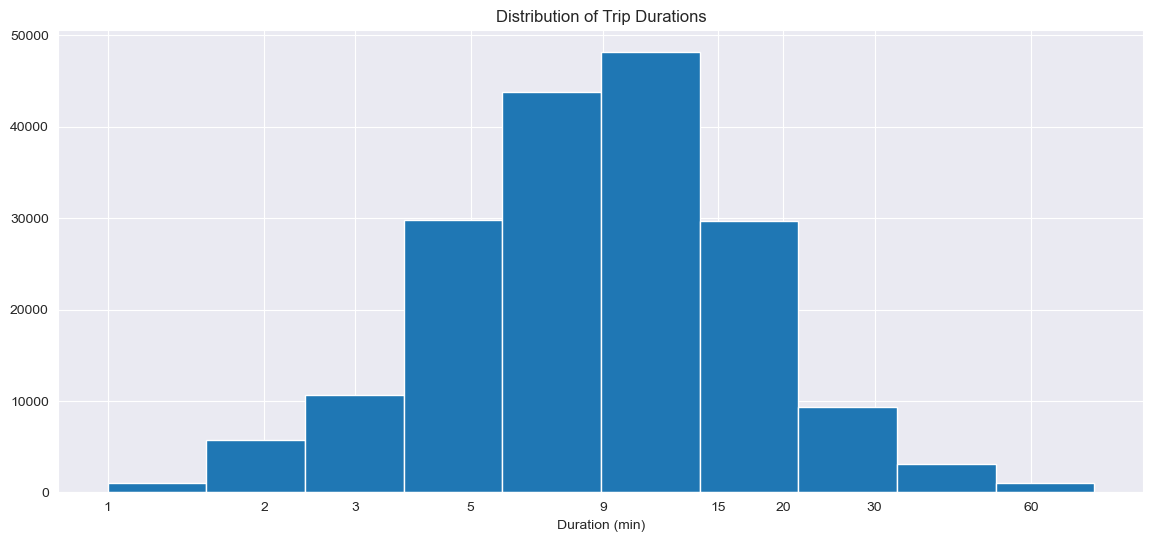

In [5]:
# creating duration by minutes column
bike_trips['duration_min'] = np.round(bike_trips.duration_sec / 60.0)

log_binsize = 0.19
bins = 10 ** np.arange(0.0, np.log10(60)+log_binsize, log_binsize)

# set plot dimensions
plt.figure(figsize=[14, 6])

plt.hist(data=bike_trips, x='duration_min', bins=bins)
plt.title('Distribution of Trip Durations')
plt.xscale('log')
plt.xticks([1, 2, 3, 5, 9, 15, 20, 30, 60,], [1, 2, 3, 5, 9, 15, 20, 30, 60,])

plt.xlabel('Duration (min)')
plt.show()

## Distribution of members by gender
most customers are males by a large number.

In [6]:
def my_count_plot(df, x, hue_var=None, color=0, palette=None, order=None, figsize=(14, 6)):
    """a quick hack to make count plot """
    if figsize:
        plt.figure(figsize=figsize)

    sb.countplot(data=df, x=x, hue=hue_var, color=sb.color_palette()[color], palette=palette, order=order, edgecolor='black')
    x = x.replace('_', " ")
    if hue_var:
        hue_var = hue_var.replace('_', " ")

    plt.title(f'''Distribution of {x} {'by' if hue_var else ''}'''.title(), fontsize=14, weight="bold")
    plt.xlabel(x.title(), fontsize=10, weight="bold")
    plt.ylabel('Frequency'.title(), fontsize=10, weight="bold");

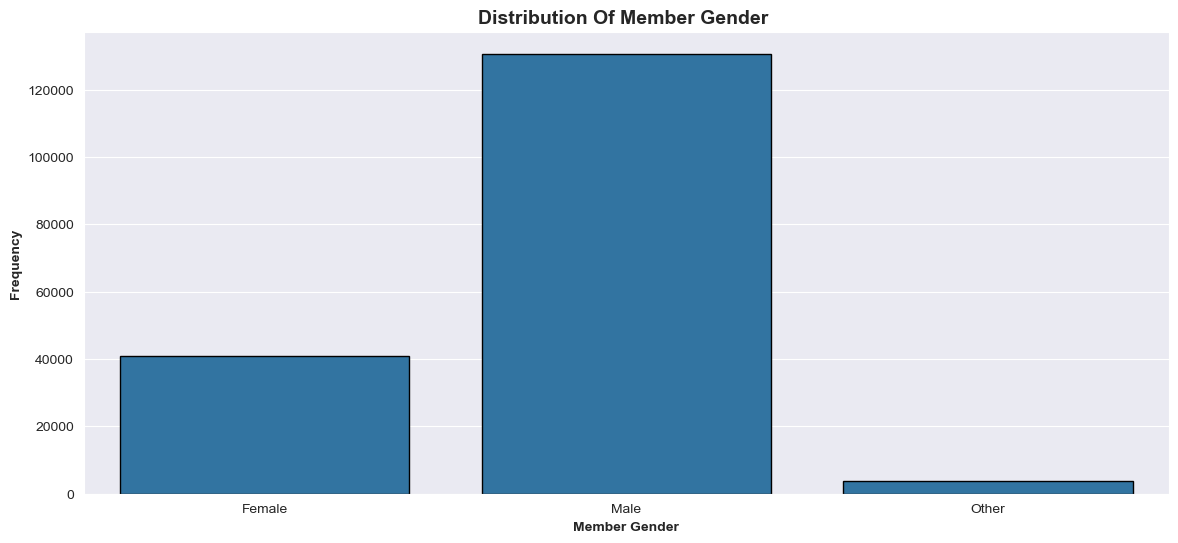

In [7]:
my_count_plot(bike_trips, 'member_gender')

## Distribution of user types
most user of the bike-sharing system are

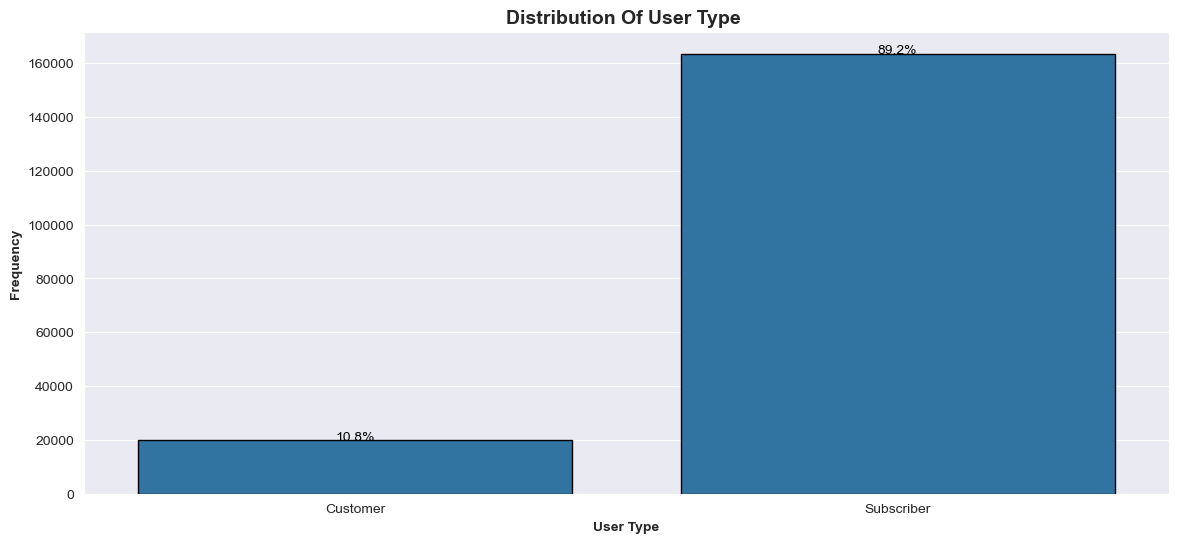

In [8]:
my_count_plot(bike_trips, 'user_type')

# Recalculating the type_proportion just to have clarity.
type_proportion = bike_trips.user_type.value_counts(normalize=True)

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=0)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    proportion = type_proportion[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * proportion)

    # print the annotation just below the top of the bar
    plt.text(loc, proportion * len(bike_trips), pct_string, ha ='center', color ='black')

## Most frequent station
The San Fransisco Caltrain Station 2 is the most frequent station if we combine the counts from start and end station of each trip.

In [9]:
def plot_top_frequencies(df, column, top=10):
    """a quick hack to plot top frequencies by a given column."""
    # set plot dimensions
    plt.figure(figsize=[14, 6])

    df[column] \
        .value_counts(ascending=True) \
        .tail(top) \
        .plot(kind='barh');

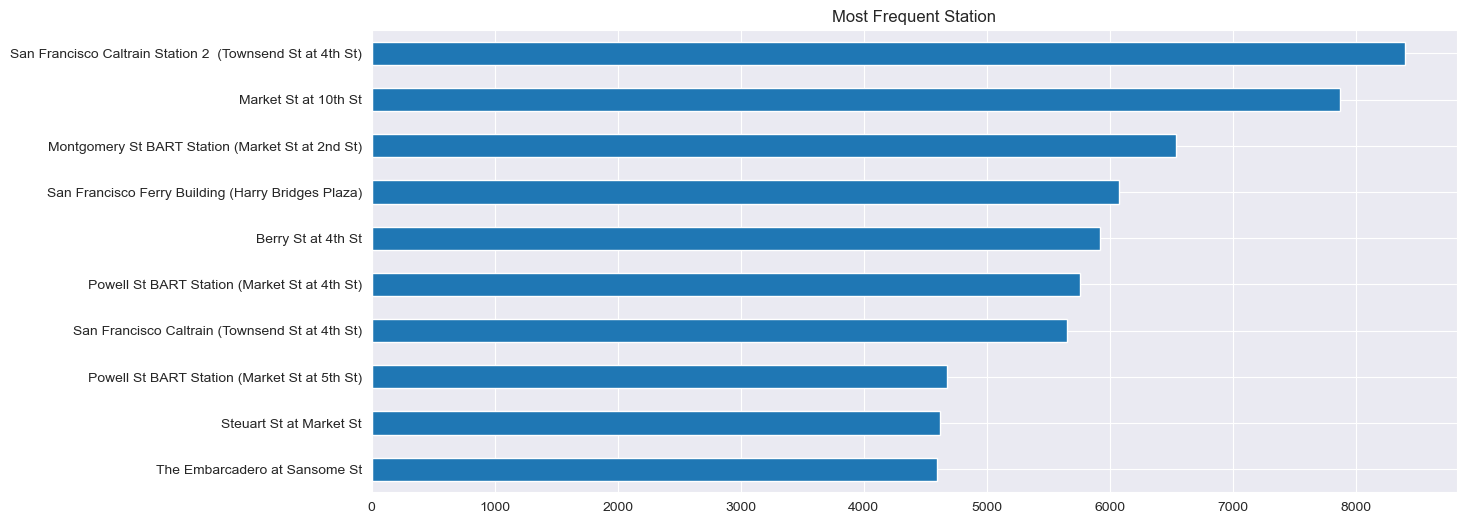

In [10]:
stations = bike_trips.melt(value_vars=['start_station_name', 'end_station_name'],
                          var_name='station_role', value_name='station').dropna()
plot_top_frequencies(stations, 'station')
plt.title('Most Frequent Station');

## Average duration by days of week
the data show an increase in average duration of trips in the weekends.

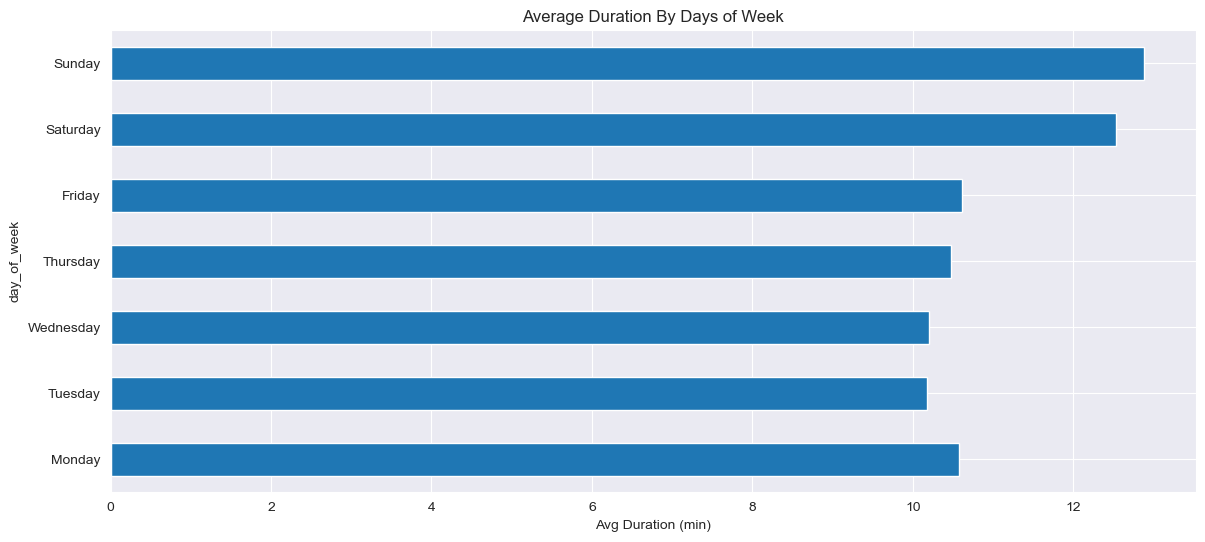

In [11]:
# getting rid of outliers
short_trips = bike_trips.query('duration_min <= 120')
# setting start time as index to begin time analysis
short_trips.set_index('start_time', inplace=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
short_trips = short_trips.assign(day_of_week = short_trips.index.day_name())

# set plot dimensions
plt.figure(figsize=[14, 6])

short_trips.groupby('day_of_week')\
    .duration_min.mean()\
    .reindex(day_order)\
    .plot.barh()
plt.xlabel('Avg Duration (min)')
plt.title('Average Duration By Days of Week');

## Average duration across days of week and user type
we see here a very steep increase in average duration for `Customer` in weekends in comparison to the increase for `Subscriber` members.

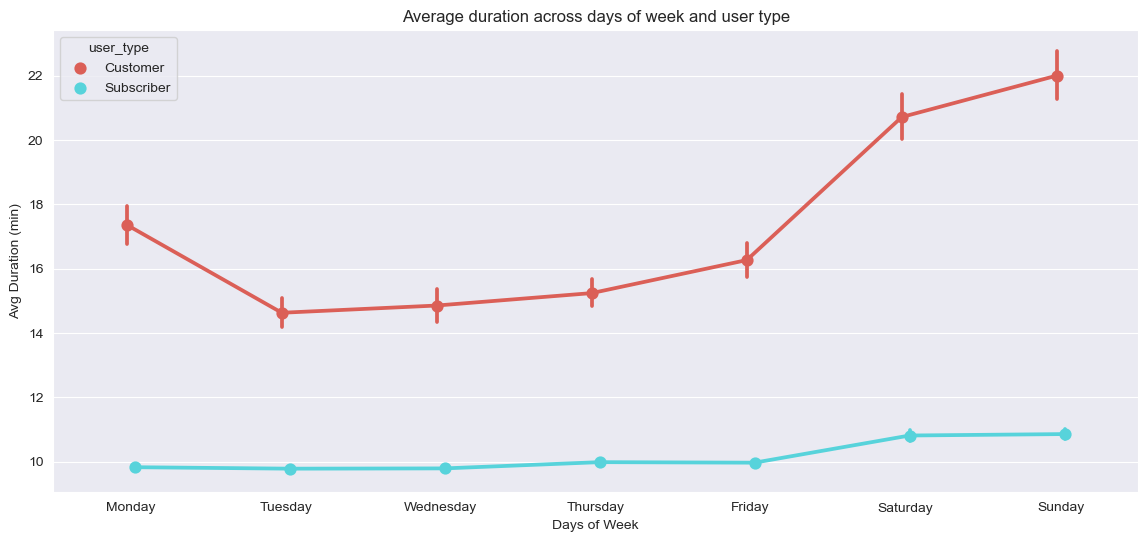

In [12]:
# set plot dimensions
plt.figure(figsize=[14, 6])
ax = sb.pointplot(data = short_trips, x = 'day_of_week', y = 'duration_min', hue = 'user_type', order=day_order,
           palette = 'hls', linestyles = '-', dodge = True)
plt.title('Average duration across days of week and user type')
plt.ylabel('Avg Duration (min)')
plt.xlabel('Days of Week')
ax.set_yticklabels([],minor = True);

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt